In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *
from scipy import interpolate

plotter = Plotter()

from fitv2 import *


import h5py



#processedDataDir = "../data/processedv4/"


#This is the path to were you saved the processed correlators.
processedDataDir = "../processed/"


gdir = '../gnuplot_data/'

#%load_ext gnuplot_kernel


dt=0.72
chi0 = 5.0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
data=dict()

In [11]:
data["h6"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h00{}000_c00500.h5".format(6),thTime=1000,dt=dt*0.947, data_format="new", processedDir=processedDataDir, plotDir=gdir)
data["h2"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h00{}000_c00500.h5".format(2),thTime=1000,dt=dt*0.948, data_format="new", processedDir=processedDataDir, plotDir=gdir)
data["h4"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h00{}000_c00500.h5".format(4),thTime=1000,dt=dt*0.948, data_format="new", processedDir=processedDataDir, plotDir=gdir)
data["h3"] = ConfResults(fn="../data/zcritical_N080_m-0481100_h00{}000_c00500.h5".format(3),thTime=1000,dt=dt*0.948, data_format="new", processedDir=processedDataDir, plotDir=gdir)

In [12]:
data["h2"].load("OtOttp","V", direc=processedDataDir)
for k in range(1,5):
    data["h2"].load("OtOttp","Vkk{}".format(k), direc=processedDataDir)
    
data["h3"].load("OtOttp","V", direc=processedDataDir)
for k in range(1,5):
    data["h3"].load("OtOttp","Vkk{}".format(k), direc=processedDataDir)

data["h4"].load("OtOttp","V", direc=processedDataDir)
for k in range(1,5):
    data["h4"].load("OtOttp","Vkk{}".format(k), direc=processedDataDir)
    
data["h6"].load("OtOttp","V", direc=processedDataDir)
for k in range(1,5):
    data["h6"].load("OtOttp","Vkk{}".format(k), direc=processedDataDir)

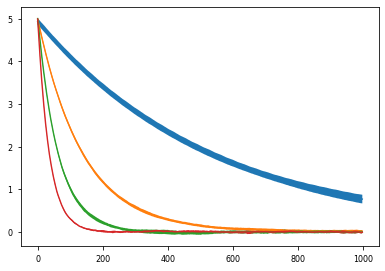

In [13]:
for k in range(1,5):
    plotter.plot(data["h3"],"OtOttp","Vkk{}".format(k))

In [14]:
fitter= dict()

fitter["h2"]=dict()
fitter["h2"]["V"] = Fitter(data["h2"], chi0 = chi0, chiperp = 1, L=80, k=0 )
for k in range(1,4):
    fitter["h2"]["Vkk{}".format(k)] = Fitter(data["h2"], chi0 = chi0, chiperp = 1, L=80, k=k )
    
fitter["h3"]=dict()
fitter["h3"]["V"] = Fitter(data["h3"], chi0 = chi0, chiperp = 1, L=80, k=0 )
for k in range(1,4):
    fitter["h3"]["Vkk{}".format(k)] = Fitter(data["h3"], chi0 = chi0, chiperp = 1, L=80, k=k )
    
fitter["h4"]=dict()
fitter["h4"]["V"] = Fitter(data["h4"], chi0 = chi0, chiperp = 1, L=80, k=0 )
for k in range(1,4):
    fitter["h4"]["Vkk{}".format(k)] = Fitter(data["h4"], chi0 = chi0, chiperp = 1, L=80, k=k )
    
fitter["h6"]=dict()
fitter["h6"]["V"] = Fitter(data["h6"], chi0 = chi0, chiperp = 1, L=80, k=0 )
for k in range(1,4):
    fitter["h6"]["Vkk{}".format(k)] = Fitter(data["h6"], chi0 = chi0, chiperp = 1, L=80, k=k )

In [15]:
for k in range(1,4):
    fitter["h2"]["Vkk{}".format(k)].setParValues("OtOttp", "Vkk{}".format(k), [0.008,0.0001])
    
for k in range(1,4):
    fitter["h3"]["Vkk{}".format(k)].setParValues("OtOttp", "Vkk{}".format(k), [0.008,0.0001])

for k in range(1,4):
    fitter["h4"]["Vkk{}".format(k)].setParValues("OtOttp", "Vkk{}".format(k), [0.008,0.0001])

for k in range(1,4):
    fitter["h6"]["Vkk{}".format(k)].setParValues("OtOttp", "Vkk{}".format(k), [0.008,0.0001])

In [168]:
#k=3
#plotter.plot(data["h3"],"OtOttp","Vkk{}".format(k),tMax = 20000, yfact = 1.0 )
#fitter["h3"]["Vkk{}".format(k)].plot("OtOttp", "Vkk{}".format(k))

In [16]:
fitter["h2"]["V"].fit("OtOttp", "V", minInd=0,maxInd=1600, prune=1)
for k in range(1,4):
    print(k)
    fitter["h2"]["Vkk{}".format(k)].fit("OtOttp", "Vkk{}".format(k), minInd=0,maxInd=1600, prune=1)

fitter["h3"]["V"].fit("OtOttp", "V", minInd=0,maxInd=1600, prune=1)
for k in range(1,4):
    print(k)
    fitter["h3"]["Vkk{}".format(k)].fit("OtOttp", "Vkk{}".format(k), minInd=0,maxInd=1600, prune=1)

fitter["h4"]["V"].fit("OtOttp", "V", minInd=0,maxInd=1600, prune=1)
for k in range(1,4):
    print(k)
    fitter["h4"]["Vkk{}".format(k)].fit("OtOttp", "Vkk{}".format(k), minInd=0,maxInd=1600, prune=1)

fitter["h6"]["V"].fit("OtOttp", "V", minInd=0,maxInd=1600, prune=1)
for k in range(1,4):
    print(k)
    fitter["h6"]["Vkk{}".format(k)].fit("OtOttp", "Vkk{}".format(k), minInd=0,maxInd=1600, prune=1)

[2.64617708e-25+0.j 2.64618693e-25+0.j 2.64619399e-25+0.j ...
 2.64425950e-25+0.j 2.64423918e-25+0.j 2.64421696e-25+0.j]
1
[5.03791005+0.00000000e+00j 5.03147961-6.90510060e-05j
 5.02563496-5.90150462e-04j ... 0.74859186+1.17147309e-02j
 0.74783005+1.19475308e-02j 0.74639497+1.19748917e-02j]
2
[ 5.01124604+0.00000000e+00j  4.98797917+4.57445325e-05j
  4.96503755-1.78888275e-04j ... -0.01354949+3.66831831e-03j
 -0.01344807+3.84857646e-03j -0.01405297+3.89346786e-03j]
3
[5.00809103+0.j         4.95719577+0.00136049j 4.90552273+0.00081145j ...
 0.0086196 +0.00021765j 0.00818998+0.00191243j 0.00934527+0.00342971j]
[7.15834556e-26+0.j 7.15821029e-26+0.j 7.15817527e-26+0.j ...
 7.14888836e-26+0.j 7.14910901e-26+0.j 7.14918385e-26+0.j]


/Users/eduardogrossi/langevinA_Alex/jupyter_notebooks/../python/fitv2.py:32: RuntimeWarning: overflow encountered in exp
  numerator= 2.0 * susc * gammap * mp**2
/Users/eduardogrossi/langevinA_Alex/jupyter_notebooks/../python/fitv2.py:32: RuntimeWarning: overflow encountered in multiply
  numerator= 2.0 * susc * gammap * mp**2
/Users/eduardogrossi/langevinA_Alex/jupyter_notebooks/../python/fitv2.py:97: RuntimeWarning: overflow encountered in true_divide
  return np.sum(np.square(z))
/Users/eduardogrossi/langevinA_Alex/jupyter_notebooks/../python/fitv2.py:103: RuntimeWarning: overflow encountered in square
  obs = ["OtOttp", "OtOttpFourier", "propagatorF", "propagator"]


1
[4.93508826+0.j         4.92907981-0.00081614j 4.92235708-0.00089026j ...
 0.769862  +0.00649509j 0.7689615 +0.00703703j 0.76742121+0.00750612j]
2
[4.97958259+0.j         4.95780736+0.00110832j 4.93534325+0.00223425j ...
 0.01272238-0.02156902j 0.01216254-0.0207257j  0.01238785-0.0202036j ]
3
[ 5.00093366+0.j          4.94965532-0.00071084j  4.89864657-0.00205356j
 ... -0.00503505-0.0030535j  -0.00535731-0.00268626j
 -0.00507598-0.00217746j]
[7.86955353e-26+0.j 7.86944099e-26+0.j 7.86949965e-26+0.j ...
 7.85733992e-26+0.j 7.85739816e-26+0.j 7.85778439e-26+0.j]
1
[5.05853228+0.j         5.05314851+0.0001465j  5.04743077+0.00038876j ...
 0.84897302-0.00695988j 0.84851669-0.00657268j 0.84743383-0.00624116j]
2
[ 5.01718939+0.j          4.99405841+0.00031937j  4.97022043+0.00094354j
 ... -0.01203453+0.00799812j -0.01285861+0.00847788j
 -0.01345555+0.00830219j]
3
[4.97470417e+00+0.j         4.92330166e+00-0.00103228j
 4.87176067e+00-0.00133189j ... 7.28285374e-03-0.00706323j
 6.38602872e-0

[0.015668266823932298, 1.8496066027870461e-06]


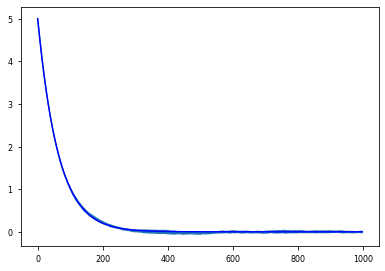

In [17]:
plotter.plot(data["h3"],"OtOttp","Vkk3",tMax = 20000, yfact = 1.0 )
fitter["h3"]["Vkk3"].plot("OtOttp", "Vkk3")

[0.00726846515809758, -3.409017036853923e-07]


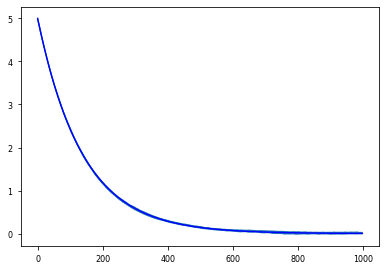

In [18]:
plotter.plot(data["h3"],"OtOttp","Vkk2",tMax = 20000, yfact = 1.0 )
fitter["h3"]["Vkk2"].plot("OtOttp", "Vkk2")

[0.0072165700105655105, 6.476838426347498e-07]
[0.00726846515809758, -3.409017036853923e-07]
[0.00689270510469874, 9.430845481078753e-07]
[0.006898765320280073, 5.657009879839192e-07]


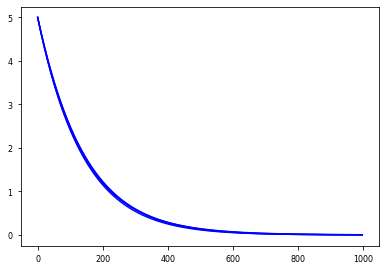

In [19]:
fitter["h2"]["Vkk2"].plot("OtOttp", "Vkk2")
fitter["h3"]["Vkk2"].plot("OtOttp", "Vkk2")
fitter["h4"]["Vkk2"].plot("OtOttp", "Vkk2")
fitter["h6"]["Vkk2"].plot("OtOttp", "Vkk2")

In [53]:
hloop=[ "h2","h3","h4","h6"]

numofkappas=4
a=dict()
chireduced=dict()
errochi=dict()
aerr=dict()
for h in hloop:
    a[h]=np.zeros(numofkappas)
    chireduced[h]=np.zeros(numofkappas)
    errochi[h]=np.zeros(numofkappas)
    aerr[h]=np.zeros(numofkappas)
for h in hloop:    
    chireduced[h][0]=fitter[h]["V"].averagechi2reduce["OtOttp"]["V"]
    errochi[h][0]=fitter[h]["V"].ndof["OtOttp"]["V"]
    a[h][0]=fitter[h]["V"].par["OtOttp"]["V"][0]
    aerr[h][0]=fitter[h]["V"].parErr["OtOttp"]["V"][0]
    for l in range(1,numofkappas):
        chireduced[h][l]=fitter[h]["Vkk{}".format(l)].averagechi2reduce["OtOttp"]["Vkk{}".format(l)]
        errochi[h][l]=fitter[h]["Vkk{}".format(l)].ndof["OtOttp"]["Vkk{}".format(l)]
        a[h][l]=fitter[h]["Vkk{}".format(l)].par["OtOttp"]["Vkk{}".format(l)][0]
        aerr[h][l]=fitter[h]["Vkk{}".format(l)].parErr["OtOttp"]["Vkk{}".format(l)][0]
        

In [55]:
a

{'h2': array([0.        , 0.00177735, 0.00721657, 0.01587428]),
 'h3': array([0.        , 0.00192265, 0.00726847, 0.01566827]),
 'h4': array([0.        , 0.00171329, 0.00689271, 0.01575564]),
 'h6': array([0.        , 0.00166656, 0.00689877, 0.01529656])}

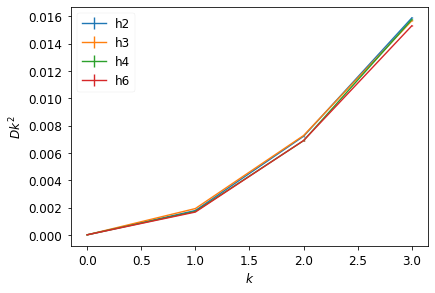

In [54]:
for h in hloop:
    a[h][0]=0
    aerr[h][0]=0
    plt.errorbar(range(0,numofkappas), a[h],aerr[h])
plt.ylabel("$D k^2 $",fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.xlabel("$k$",fontsize=12)
plt.legend(hloop,prop={'size': 12})
plt.savefig('Dvector.pdf')

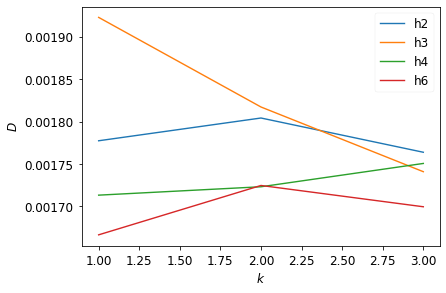

In [52]:
Dk=dict()
for h in hloop:
    Dk[h]=np.zeros(numofkappas-1)
    for k in range(0,numofkappas-1):
        Dk[h][k]=a[h][k+1]/((k+1)*(k+1)) 
    plt.plot(range(1,numofkappas), Dk[h])
plt.ylabel("$D $",fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.xlabel("$k$",fontsize=12)
plt.legend(hloop,prop={'size': 12})
plt.savefig('Dvector.pdf')